In [15]:
import numpy as np
import scipy as sp
import pandas as pd
from subprocess import check_output

import time, json
from datetime import date

import time
import math
import sklearn.preprocessing as prep
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [16]:
df= pd.read_csv('groupeddf.csv')
df4=df.set_index("Code")

In [17]:
uniqueVals = df["Code"].unique()  


In [18]:
#'3IINFOTECH', '8KMILES', 'ABAN'

#df1=grouped_df.loc["8KMILES",:]
df1=df.loc[df['Code'] == "8KMILES"]
df2=df1.reset_index()
label=df2['Date'].values.tolist()
trainset=df2['Open'].values.tolist()
df2

,index,Code,Date,Open,High,Low,Close,Volume
0,158,8KMILES,2014-12-18,561.963918,562.615636,561.317698,562.008419,148.219931
1,159,8KMILES,2014-12-19,588.985235,589.995805,588.078859,589.031208,335.969799
2,160,8KMILES,2014-12-22,603.079123,603.608772,602.417544,603.047193,169.870175
3,161,8KMILES,2014-12-23,600.358528,600.876254,599.931438,600.357692,97.444816
4,162,8KMILES,2014-12-24,588.538106,589.038987,588.018722,588.531498,117.449339
...,...,...,...,...,...,...,...,...
178,336,8KMILES,2015-09-24,1425.896581,1426.803205,1425.048077,1425.834615,85.448718
179,337,8KMILES,2015-09-28,1413.101322,1413.839868,1412.314537,1412.951322,71.374449
180,338,8KMILES,2015-09-29,1383.679461,1384.679253,1382.544606,1383.513900,82.506224
181,339,8KMILES,2015-09-30,1400.488693,1400.946985,1399.891960,1400.346734,54.628141


In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
def create_dataset(dataset,past=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-past-1):
        j = dataset[i:(i+past), 0]
        dataX.append(j)
        dataY.append(dataset[i + past, 0])
        #print(j,dataset[i + past, 0])
    #print(np.array(dataX), np.array(dataY))
    return np.array(dataX), np.array(dataY)

In [21]:
from sklearn.preprocessing import MinMaxScaler
def testandtrain(prices):
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    trainsize = int(len(prices) * 0.80)
    testsize = len(prices) - trainsize
    train, test = prices[0:trainsize,:], prices[trainsize:len(prices),:]
    #print(len(train), len(test))
    
    x_train,y_train = create_dataset(train,1)
    x_test,y_test = create_dataset(test,1)
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    #y_test =scaler.fit_transform(y_test)
    #y_train=scaler.fit_transform(y_train)
    return x_train,y_train, x_test,y_test





In [22]:
prices = df2['Close'].values.astype('float32') 
prices = prices.reshape(len(prices), 1)
prices.shape



(183, 1)

In [23]:
trainX, trainY, testX, testY=testandtrain(prices)

In [24]:
from sklearn.ensemble import RandomForestRegressor
randomforest  = RandomForestRegressor(random_state=2017,verbose=2,n_jobs=5) #random forest algorithm
randomforest.fit(trainX,trainY)
test=[]
test= randomforest.predict(testX)


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100building tree 4 of 100building tree 5 of 100


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100

building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100

building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100

building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100building tree 33 of 100building tree 34 of 100


building tree 35 of 100
building tree 36 of 100
buil

In [25]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))


0.5011407694175555

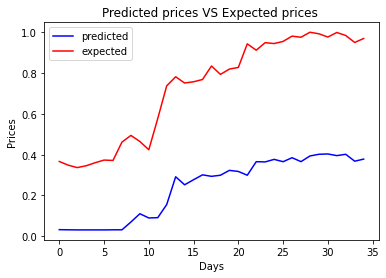

In [26]:
plt.plot(test,color="blue",label='predicted')
plt.plot(testY,color='red',label='expected')
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend(loc=0)
plt.title('Predicted prices VS Expected prices ')
plt.show()